In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# step-1 Data Handling

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Percentage of Missing Value in Every Columns

In [8]:
df.isna().sum()*100/ len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Missing Values Imputation

# 1.Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

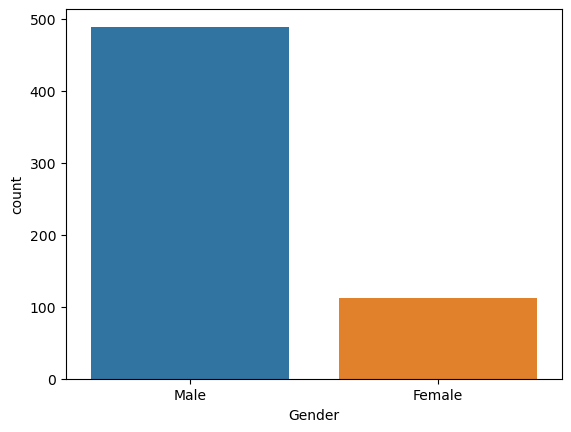

In [11]:
sns.countplot(x = df['Gender'])

In [13]:
df['Gender'].mode()[0]

'Male'

In [14]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# 2.Married

<AxesSubplot:xlabel='Married', ylabel='count'>

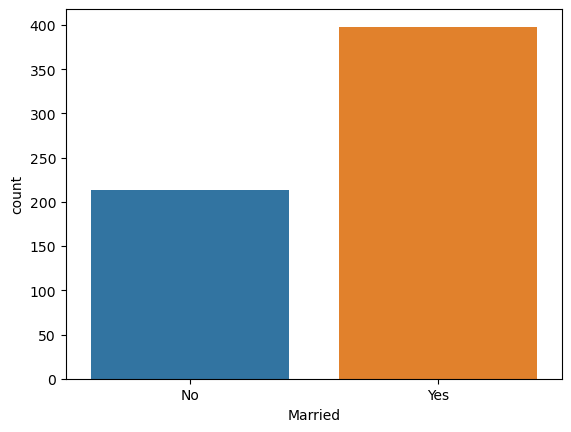

In [15]:
sns.countplot(x = df['Married'])

In [16]:
df['Married'].mode()[0]

'Yes'

In [17]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

# 3. Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

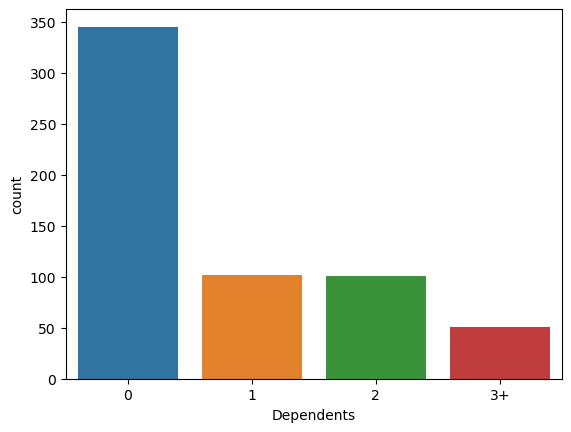

In [18]:
sns.countplot(x = df['Dependents'])

In [21]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
df['Dependents'].mode()[0]

'0'

In [23]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# 4. Self Employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

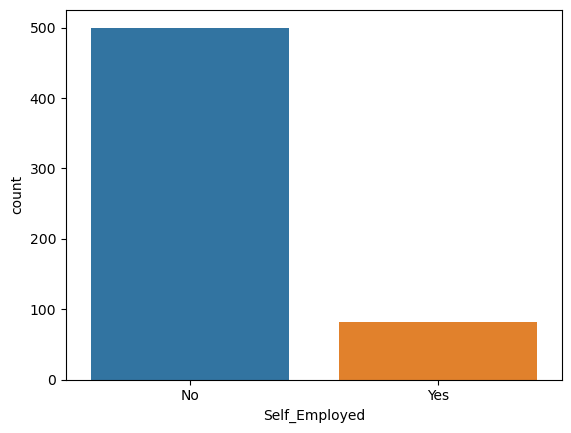

In [24]:
sns.countplot(x = df['Self_Employed'])

In [25]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [26]:
df['Self_Employed'].mode()[0]

'No'

In [27]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [28]:
df.isna().sum()*100/ len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# 5. Loan Amount

In [29]:
df['LoanAmount'].median()

128.0

In [31]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# 6. Loan_Amount_Term

In [32]:
df['Loan_Amount_Term'].median()

360.0

In [33]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# 7. Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

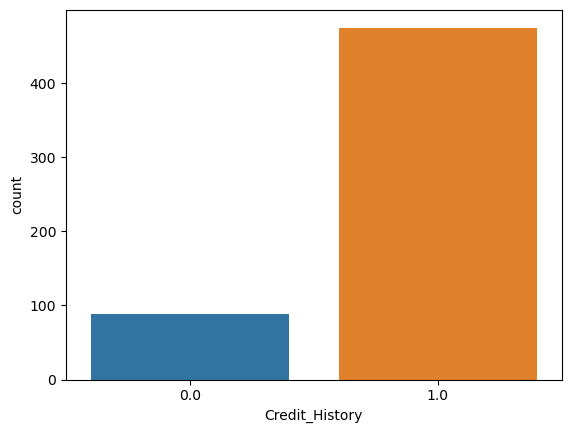

In [34]:
sns.countplot(x = df['Credit_History'])

In [35]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [36]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [37]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Step-4 Feature Creations

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.replace({
    "Loan_Status": {'N': 0, 'Y': 1},
    "Gender": {'Male': 0, 'Female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Married": {'No': 0, 'Yes': 1},
    "Self_Employed": {'No': 0, 'Yes': 1}
}, inplace =True)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


# Step-5 Train Test and Split the Data

In [8]:
def train_test_split_and_features(df):
    y = df["Loan_Status"]
    x = df.drop(['Loan_Status', 'Loan_ID'], axis = 1)
    x = pd.get_dummies(data = x, columns = ['Property_Area', 'Dependents']) # here these two columns have more than two categorical features so we convert it into dummies data
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test, features

In [9]:
x_train, x_test, y_train, y_test, features = train_test_split_and_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0     0.0      0.0          1            0.0             5849   
1     0.0      1.0          1            0.0             4583   
2     0.0      1.0          1            1.0             3000   
3     0.0      1.0          0            0.0             2583   
4     0.0      0.0          1            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                    0                        0                    1   
1                    1                      

# Step-6 Fit and Evaluate the Model

In [ ]:
# If we want to capture linear as well as non-linear pattern we should go with non-linear model like random forest or xg-boost

In [12]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest = RandomForestClassifier(random_state=0,\
                                          max_depth=5,\
                                          min_samples_split = 0.01,\
                                          max_features = 0.8,
                                          max_samples = 0.8) # this is related to bagging concept within random forest it help in reducing overfitting.
    model = random_forest.fit(x_train,y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print('Confusion Matrix')
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:", random_forest_acc_score*100, '\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [11]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [16]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace = True)

NameError: name 'model' is not defined

In [13]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance', 'feature']
importances.sort_values(by = 'importance', ascending=True,inplace = True)

NameError: name 'model' is not defined

# Step-7 Feature Importance

In [ ]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

In [14]:
#Predicted Probability for each class

In [ ]:
rf_proba = model.predict_probe(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)